# Imports for program
Below are a list of all imported libraries relevant to this program. Some are no longer used, and are here for the purpose of documenting libraries used during development and debugging.

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ridge_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
import ast
import matplotlib.pyplot as plt

# Creation of the data element
As Preprocessing.ipynb has already done the work of merging our datasets, this bit of code is just grabbing the merged csv file and putting it into the code as Data.

In [93]:
Data = pd.read_csv('merged_steam_data.csv')
Data

,appid,name_x,price_x,ccu,type,name_y,required_age,is_free,controller_support,dlc,...,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,10,Counter-Strike,999.0,16360,game,Counter-Strike,0.0,False,NaN,NaN,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 118156},NaN,"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,220,Half-Life 2,999.0,1177,game,Half-Life 2,0.0,False,NaN,[323140],...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 904, 'name': 'Half-Life 2 Trailer', 't...",{'total': 103743},"{'total': 33, 'highlighted': [{'name': 'Defian...","{'coming_soon': False, 'date': '16 Nov, 2004'}","{'url': 'http://steamcommunity.com/app/220', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
2,240,Counter-Strike: Source,999.0,7752,game,Counter-Strike: Source,0.0,False,NaN,NaN,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 87660},"{'total': 147, 'highlighted': [{'name': 'Someo...","{'coming_soon': False, 'date': '1 Nov, 2004'}","{'url': 'http://steamcommunity.com/app/240', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
3,550,Left 4 Dead 2,999.0,20328,game,Left 4 Dead 2,0.0,False,full,NaN,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 5952, 'name': 'Left 4 Dead - The Sacri...",{'total': 418847},"{'total': 101, 'highlighted': [{'name': 'CL0WN...","{'coming_soon': False, 'date': '16 Nov, 2009'}","{'url': 'http://steamcommunity.com/app/550', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Left 4 Dead 2 featur..."
4,620,Portal 2,199.0,2793,game,Portal 2,0.0,False,full,[323180],...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 81613, 'name': 'Portal 2 - Perpetual T...",{'total': 227268},"{'total': 51, 'highlighted': [{'name': 'Wake U...","{'coming_soon': False, 'date': '18 Apr, 2011'}","{'url': 'http://steamcommunity.com/app/620', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,1593500,God of War,4999.0,12509,game,God of War,18,False,full,NaN,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 256864004, 'name': 'Features Trailer',...",{'total': 19841},"{'total': 37, 'highlighted': [{'name': 'Father...","{'coming_soon': False, 'date': '14 Jan, 2022'}",{'url': 'https://support.sms.playstation.com/h...,https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Gameplay consists of..."
335,1677740,Stumble Guys,799.0,4423,game,Stumble Guys,0,False,NaN,NaN,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 16, 'path_thumbnail': 'https://cdn.aka...","[{'id': 256856802, 'name': 'Stumble Guys out o...",{'total': 1046},NaN,"{'coming_soon': False, 'date': '7 Oct, 2021'}","{'url': '', 'email': 'support@kitkagames.com'}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
336,1794680,Vampire Survivors,299.0,52451,game,Vampire Survivors,0.0,False,full,NaN,...,"[{'id': 2, 'description': 'Single-pla

# Checking genres available
As this model is seperating games by different genres, the following code is built to create a list of all genres within the dataset. As a set, the data structure will not hold repeating entries, meaning every genre is saved exactly once. The primary obstacle is that the genres collumn is saved as an array of series, meaning I could not extract each genre in a traditional way.

In [94]:
Data = Data.dropna(subset='genres')
genres = {""}

for i in Data.loc[:, "genres"]:
    literal = ast.literal_eval(i)
    for x in literal:
        genres.add(x ["description"])
        #print(x ["description"])

genres

{'',
 'Action',
 'Adventure',
 'Casual',
 'Early Access',
 'Indie',
 'Massively Multiplayer',
 'RPG',
 'Racing',
 'Simulation',
 'Sports',
 'Strategy'}

# Sorting the list
As we now can see a list of all available genres, we now must create a list of each game in each genre, and merge them together. The dataset is built with the idea entries within multiple genres will be repeated, as each genre will be analyzed and predicted seperately. At the end, all genres are put together into a single data structure, to be analyzed in a loop for each seperate genre.

In [95]:
Action = Data[0:0]
Adventure = Data[0:0]
Casual = Data[0:0]
EarlyAccess = Data[0:0]
Indie = Data[0:0]
MassivelyMultiplayer = Data[0:0]
RPG = Data[0:0]
Racing = Data[0:0]
Simulation = Data[0:0]
Sports = Data[0:0]
Strategy = Data[0:0]

for i,x in Data.iterrows():
    if 'Action' in x ["genres"]:
        Action.loc[len(Action)] = x

    if 'Adventure' in x ["genres"]:
        Adventure.loc[len(Adventure)] = x
    
    if 'Casual' in x ["genres"]:
        Casual.loc[len(Casual)] = x
    
    if 'Early Access' in x ["genres"]:
        EarlyAccess.loc[len(EarlyAccess)] = x
    
    if 'Indie' in x ["genres"]:
        Indie.loc[len(Indie)] = x
    
    if 'Massively Multiplayer' in x ["genres"]:
        MassivelyMultiplayer.loc[len(MassivelyMultiplayer)] = x
    
    if 'RPG' in x ["genres"]:
        RPG.loc[len(RPG)] = x
    
    if 'Racing' in x ["genres"]:
        Racing.loc[len(Racing)] = x
    
    if 'Simulation' in x ["genres"]:
        Simulation.loc[len(Simulation)] = x
    
    if 'Sports' in x ["genres"]:
        Sports.loc[len(Sports)] = x
    
    if 'Strategy' in x ["genres"]:
        Strategy.loc[len(Strategy)] = x
    
    

Action.loc[:, "genres"] = 'Action'
Action = Action.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Adventure.loc[:, "genres"] = 'Adventure'
Adventure = Adventure.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Casual.loc[:, "genres"] = 'Casual'
Casual = Casual.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

EarlyAccess.loc[:, "genres"] = 'Early Access'
EarlyAccess = EarlyAccess.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Indie.loc[:, "genres"] = 'Indie'
Indie = Indie.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

MassivelyMultiplayer.loc[:, "genres"] = 'Massively Multiplayer'
MassivelyMultiplayer = MassivelyMultiplayer.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

RPG.loc[:, "genres"] = 'RPG'
RPG = RPG.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Racing.loc[:, "genres"] = 'Racing'
Racing = Racing.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Simulation.loc[:, "genres"] = 'Simulation'
Simulation = Simulation.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Sports.loc[:, "genres"] = 'Sports'
Sports = Sports.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Strategy.loc[:, "genres"] = 'Strategy'
Strategy = Strategy.loc[:,['name_x', 'price_x', 'ccu', 'genres']]


RelevantData = pd.concat([Action, Adventure, Casual, EarlyAccess, Indie, MassivelyMultiplayer, RPG, Racing, Simulation, Sports, Strategy], ignore_index=True)


C:\Users\n-rasmussen\AppData\Local\Temp\ipykernel_7396\1725023512.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Action.loc[len(Action)] = x
C:\Users\n-rasmussen\AppData\Local\Temp\ipykernel_7396\1725023512.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Action.loc[len(Action)] = x
C:\Users\n-rasmussen\AppData\Local\Temp\ipykernel_7396\1725023512.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Action.loc[len(Action)] = 

# Altering and Processing values
In their raw state, the data is hard to read, and prediction is inaccurate. Because player ccu can be varied, and increase by orders of magnitude at higher levels, ccu was made into a logorythmic format, so data can be more accurately understood. Additionally, because it looks off to view price by cents, the value was changed into a float and divided by 100. This allows the price to be viewed as USD, and allow for better framing.

In [96]:
RelevantData ['ccu'] = RelevantData ['ccu'].astype(float)
RelevantData ['price_x'] = RelevantData ['price_x'].astype(float)
RelevantData ['price_x'] = RelevantData ['price_x'] / 100
RelevantData ['ccu'] = np.log1p(RelevantData ['ccu'])

# Graphing the data
With the data properly processed, the following code is to show a scatterplot of the data. The scatterplot will be recreated with the model added after it is created.

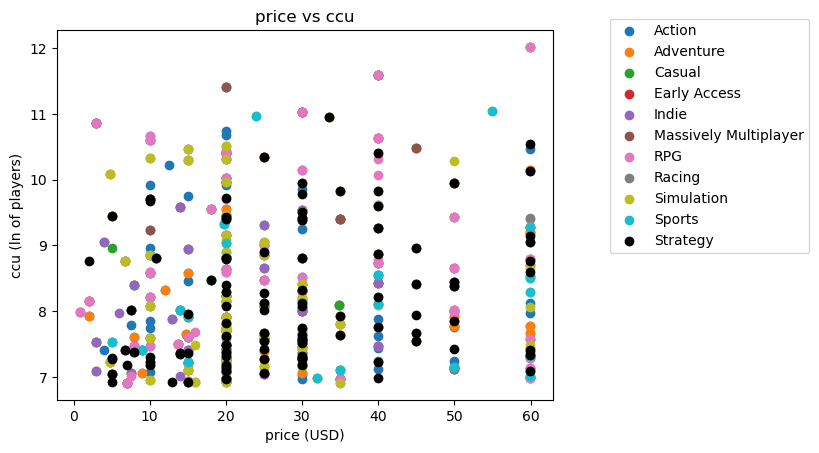

In [97]:


fig, ax = plt.subplots()

genres = RelevantData["genres"].unique()

for g in genres:
  X = RelevantData.loc[RelevantData.genres == g, 'price_x']
  y = RelevantData.loc[RelevantData.genres == g, 'ccu']

  if g == 'Strategy':
    ax.scatter(X,y, color = 'black', label = g)
  else:
    ax.scatter(X,y, label = g)

ax.set_xlabel("price (USD)")
ax.set_ylabel("ccu (ln of players)")
ax.set_title("price vs ccu")
ax.legend(bbox_to_anchor=(1.1, 1.05))
#ax.legend()

# Creating and training the model
The following code creates a list of ridge regressors, each trained off the games of a different genre. For each genre, the data is split into training and test data, then sent through a gridsearchcv model to find the best values for alpha, fit_intercept, and max_iter. Aftrwards, the training results are displayed, and the model is saved into the list. A random state was chosen to keep all data consistent among iterations, and when its called in other training blocks.

In [98]:


modelgenres = pd.Series()
for g in genres:
  print("results for " + g + ": \n")
  X = RelevantData.loc[RelevantData.genres == g, ['price_x']]
  y = RelevantData.loc[RelevantData.genres == g, ['ccu']]
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)
  
  

  #param = [float(x/10) for x in range(0, 20)]
  param = {
    #"alpha": [float(x/10) for x in range(0, 200)]
    "alpha": range(0, 20),
    "fit_intercept" : [True, False],
    "max_iter" : range(1000, 15000, 1000)
  }
  
  model = Ridge(random_state= 20)

  gsModel = GridSearchCV(model, 
                        param_grid = param,
                        scoring=["neg_mean_squared_error", "r2"],
                        refit= "r2",
                        cv=5
                       )

  gsModel.fit(X_train, y_train)

  #modelgenres.add(g)

  model = gsModel.best_estimator_

  modelgenres [g] = model

  display(gsModel.best_params_)
  display(gsModel.best_score_)

  display(mean_squared_error(y_train, gsModel.predict(X_train)))
  display(r2_score(y_train, gsModel.predict(X_train)))




results for Action: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

-0.04094981858318873

1.3156366809093505

0.0007707744972929031

results for Adventure: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

-0.04825059212532976

1.2299396501110897

0.033102713605685063

results for Casual: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

-0.05894567575536014

0.950168381318386

0.06564082096335555

results for Early Access: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

-1.7322516984801726

1.2262260065073847

0.040984706851109554

results for Indie: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

-0.04197995730370394

1.179679476600259

0.006364255816014741

results for Massively Multiplayer: 



{'alpha': 0, 'fit_intercept': True, 'max_iter': 1000}

-11.45116270458646

1.7538596980046255

0.08745378541671245

results for RPG: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

-0.21053695581850046

1.7948064098791772

0.00012128032808922384

results for Racing: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

-5.402912299724411

0.7511204915122529

0.00043615668690966114

results for Simulation: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

-0.0427476918783269

1.3376003736012676

0.01005501810727405

results for Sports: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

-0.5497137334116555

0.9810263922557715

0.04392313115594326

results for Strategy: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

-0.008048119639782646

0.9650704411992715

0.07729615544411272

# Comparing to testing data
In the following block of code, each of the best models of their respective genre is compared to the testing data of the that genre. In most cases, this resulted in a negative value, suggesting a very poor fitting.

In [99]:
for g in genres:
  print("results for " + g + ": \n")
  X = RelevantData.loc[RelevantData.genres == g, ['price_x']]
  y = RelevantData.loc[RelevantData.genres == g, ['ccu']]
  
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)
  model = model = modelgenres [g]
  
  print(r2_score(y_train, model.predict(X_train)))
  print(r2_score(y_test, model.predict(X_test)))

results for Action: 

0.0007707744972929031
7.009667561064248e-06
results for Adventure: 

0.033102713605685063
0.009409893533278701
results for Casual: 

0.06564082096335555
-0.44513104994550745
results for Early Access: 

0.040984706851109554
-0.06345182423768825
results for Indie: 

0.006364255816014741
-0.023361487009898818
results for Massively Multiplayer: 

0.08745378541671245
-0.32370638486004877
results for RPG: 

0.00012128032808922384
-0.08802590214648998
results for Racing: 

0.00043615668690966114
-0.3357189181892899
results for Simulation: 

0.01005501810727405
-0.2671667968922389
results for Sports: 

0.04392313115594326
-0.42063281343467507
results for Strategy: 

0.07729615544411272
-0.0067466172055288265


# Plotting the data
The scatterplot created from this block of code displays the regression models, compared to their given dataset. What is shown is a wide scaling dataset, with little relation between the x and y values. This shows how these models fail to properly regress the system.

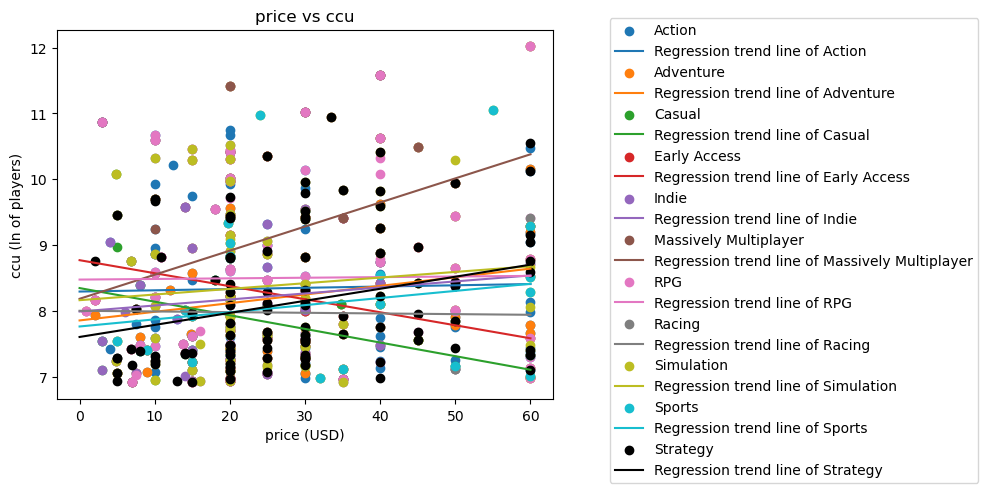

In [100]:

fig, ax = plt.subplots()
'''fig.set_figheight(40)
fig.set_figwidth(20)'''


for g in genres:
  X = RelevantData.loc[RelevantData.genres == g, ['price_x']]
  y = RelevantData.loc[RelevantData.genres == g, ['ccu']]

  if g == 'Strategy':
    ax.scatter(X,y, color = 'black', label = g)
  else:
    ax.scatter(X,y, label = g)
#  print("results for " + g + ": \n")

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)
  model = model = modelgenres [g]
  
  #print(X_train)

  slope = model.coef_
  x_graph = np.linspace(0, 60)
  x_graph = x_graph.reshape(-1,1)
  y_graph = (x_graph * slope) + model.intercept_

  if g == 'Strategy':
    ax.plot(x_graph, y_graph, label="Regression trend line of " + g, color = 'black')
  else:
    ax.plot(x_graph, y_graph, label="Regression trend line of " + g)


ax.set_xlabel("price (USD)")
ax.set_ylabel("ccu (ln of players)")
ax.set_title("price vs ccu")
ax.legend(bbox_to_anchor=(1.1, 1.05))
#ax.legend()

# Expected vs predicted y values
One more graph used to view the models is seeing the values the models predict with a given value. This shows further how each variable has little relation to one another. This lack of relation shows how the model fundementally could not work, and creates evidence against our proposed hypothesis.

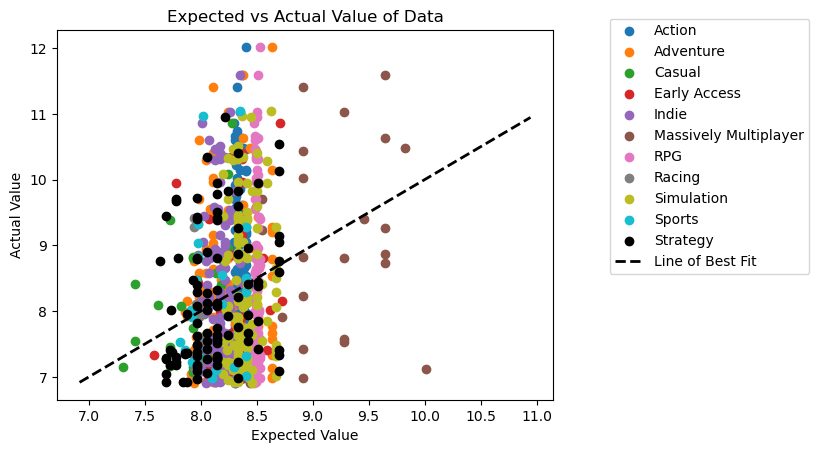

In [103]:
fig, ax = plt.subplots()
ax

matrices = []
for g in genres:
  X = RelevantData.loc[RelevantData.genres == g, ['price_x']]
  y = RelevantData.loc[RelevantData.genres == g, ['ccu']]

  model = model = modelgenres [g]

  if g == 'Strategy':
    ax.scatter(model.predict(X),y, color = 'black', label = g)
  else:
    ax.scatter(model.predict(X),y, label = g)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label = 'Line of Best Fit')
ax.set_xlabel("Expected Value")
ax.set_ylabel("Actual Value")
ax.set_title("Expected vs Actual Value of Data")
ax.legend(bbox_to_anchor=(1.1, 1.05))
